# Trabajar con librería Pandas

 - Crear dataframe desde listas, diccionarios
 - Leer desde fichero
 - Trabajar con columnas
 - Filtros, ordenaciones
 - Tratar fechas
 - Agregados
 - Exportar ficheros

Importamos la librería __Pandas__

In [79]:
import pandas as pd  # pd es la abreviatura estandar

Pasamos de un diccionario de listas a un dataframe (df) de Pandas

In [80]:
clientes = {'nombre': ['Jorge', 'Luis', 'Pilar', 'Ana'],
            'edad': [33, 25, 44, 27],
            'ciudad': ['Valladolid', 'Madrid', 'Madrid', 'Cuenca']   
            }
type(clientes)

dict

In [81]:
clientes = {'nombre': ['Jorge', 'Luis', 'Pilar', 'Ana'],
            'edad': [33, 25, 44, 27],
            'ciudad': ['Valladolid', 'Madrid', 'Madrid', 'Cuenca']   
            }

df_clientes = pd.DataFrame(clientes)
# El df toma como nombres de las columnas los campos del diccionario
print(type(df_clientes))
df_clientes

<class 'pandas.core.frame.DataFrame'>


,nombre,edad,ciudad
0,Jorge,33,Valladolid
1,Luis,25,Madrid
2,Pilar,44,Madrid
3,Ana,27,Cuenca


__Dimensiones__ del df

In [82]:
print(df_clientes.shape)
print(df_clientes.dtypes)

(4, 3)
nombre    object
edad       int64
ciudad    object
dtype: object


Crear un dataframe partiendo de una lista y especificando
el nombre de las columnas

In [83]:
l_clientes = [['Jorge', 33, 'Valladolid'],
              ['Luis', 25, 'Madrid'],
              ['Pilar', 44, 'Zaragoza'],
              ['Ana', 37, 'Cuenca']] 

#df_clientes = pd.DataFrame(l_clientes) 

df_clientes = pd.DataFrame(l_clientes, 
   columns=['nombre', 'edad', 'ciudad'])
df_clientes

,nombre,edad,ciudad
0,Jorge,33,Valladolid
1,Luis,25,Madrid
2,Pilar,44,Zaragoza
3,Ana,37,Cuenca


Crear un dataframe partiendo de una lista de diccionarios

In [84]:
lis_dic = [
        {'ciudad': 'Madrid', 'ventas': 100, 'centro': 'C1', 'año': 2019},
        {'ciudad': 'Valencia', 'ventas': 100, 'año': 2019},
        {'ciudad': 'Murcia', 'ventas': 100, 'centro': 'C6', 'año': 2019},
        { 'ventas': 100, 'centro': 'C6', 'año': 2019, 'nueva': 50}        
        ]

df = pd.DataFrame(lis_dic)
df

,ciudad,ventas,centro,año,nueva
0,Madrid,100,C1,2019,NaN
1,Valencia,100,NaN,2019,NaN
2,Murcia,100,C6,2019,NaN
3,NaN,100,C6,2019,50.0


Lectura desde fichero: se indica el separador de campos y que infiera la cabecera

Extracto:

oficina;vendedor;producto;unidades

Madrid;m_vendedor1;P1;20

Madrid;m_vendedor1;P2;19

Madrid;m_vendedor1;P3;8

Madrid;m_vendedor1;P4;5

Recorrer un DataFrame con un bucle

In [85]:
df

,ciudad,ventas,centro,año,nueva
0,Madrid,100,C1,2019,NaN
1,Valencia,100,NaN,2019,NaN
2,Murcia,100,C6,2019,NaN
3,NaN,100,C6,2019,50.0


In [86]:
nrows = len(df)
for i in range(nrows):
    print(df['centro'][i])
    if pd.isna(df['centro'][i]):
        print("reemplazo nulo")
        df['centro'][i] = 'Z9'

C1
nan
reemplazo nulo
C6
C6


C:\Users\jhoro\AppData\Local\Temp/ipykernel_7820/2652130696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centro'][i] = 'Z9'


In [87]:
df

,ciudad,ventas,centro,año,nueva
0,Madrid,100,C1,2019,NaN
1,Valencia,100,Z9,2019,NaN
2,Murcia,100,C6,2019,NaN
3,NaN,100,C6,2019,50.0


Objeto serie de Pandas

In [88]:
serie_hist = pd.Series(index=['Ene', 'Feb', 'Mar', 'Abril', 'Mayo', 'Junio'] , 
                                            data =[33,51,48,38,57,63])
serie_hist

Ene      33
Feb      51
Mar      48
Abril    38
Mayo     57
Junio    63
dtype: int64

In [89]:
serie_hist['Ene']

33

In [90]:
serie_hist[(serie_hist > 50)]

Feb      51
Mayo     57
Junio    63
dtype: int64

Crear un DataFrame partiendo de series

In [91]:
customer = {'edad' : pd.Series(index=['c1', 'c2', 'c3'] , data =[33,31,28]),
            'consumo' : pd.Series(index=['c1', 'c2', 'c3'] , data =[100,141,200])}
df_cus = pd.DataFrame(customer) 
df_cus

,edad,consumo
c1,33,100
c2,31,141
c3,28,200


Leer DataFrame desde fichero

In [92]:
df_ventas = pd.read_csv("../Curso Python Avanzado/ficheros/f_ventas1.txt",
                 sep=';', header='infer')
df_ventas.head(10)

,oficina,vendedor,producto,unidades
0,Madrid,m_vendedor1,P1,20
1,Madrid,m_vendedor1,P2,19
2,Madrid,m_vendedor1,P3,8
3,Madrid,m_vendedor1,P4,5
4,Madrid,m_vendedor1,P5,18
5,Madrid,m_vendedor4,P14,1
6,Madrid,m_vendedor4,P15,7
7,Valencia,v_vendedor1,P10,1
8,Valencia,v_vendedor1,P11,2
9,Valencia,v_vendedor1,P12,0


In [93]:
!dir

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: 02CF-4724

 Directorio de C:\Users\jhoro\Curso Python Avanzado

31/03/2022  14:12    <DIR>          .
17/03/2022  19:47    <DIR>          ..
24/03/2022  20:46    <DIR>          .ipynb_checkpoints
24/03/2022  19:43             2.423 EJ09_pandas2_b (1).ipynb
24/03/2022  19:19            17.213 EJ09_pandas2_b.ipynb
03/03/2022  22:04             5.004 Ejemplos iniciales.ipynb
24/03/2022  20:29             4.959 ejercicios de numpy.ipynb
24/03/2022  19:34            19.054 Ejercicio_1.ipynb
10/03/2022  19:57    <DIR>          ficheros
24/03/2022  19:40            68.394 nulos.ipynb
10/03/2022  19:19            34.523 P08_funciones.ipynb
31/03/2022  14:12            99.436 P11_pandas1.ipynb
17/03/2022  21:24           145.375 P12_pandas2.ipynb
24/03/2022  20:19            33.607 P13_numpy.ipynb
              10 archivos        429.988 bytes
               4 dirs  433.985.241.088 bytes libres


In [94]:
df_ventas = pd.read_csv("ficheros\\f_ventas1.csv",
                 sep=';', header='infer')
df_ventas.head(10)

,oficina,vendedor,producto,unidades
0,Madrid,m_vendedor1,P1,20
1,Madrid,m_vendedor1,P2,19
2,Madrid,m_vendedor1,P3,8
3,Madrid,m_vendedor1,P4,5
4,Madrid,m_vendedor1,P5,18
5,Madrid,m_vendedor4,P14,1
6,Madrid,m_vendedor4,P15,7
7,Valencia,v_vendedor1,P10,1
8,Valencia,v_vendedor1,P11,2
9,Valencia,v_vendedor1,P12,0


In [95]:
# Si la carpeta del fichero estuviera al mismo nivel que la ruta del script 
# ponemos .. y luego el nombre de la carpeta donde está
df_ventas = pd.read_csv("../Curso Python Avanzado/ficheros/f_ventas1.csv",
                 sep=';', header='infer')
df_ventas.head(10)

,oficina,vendedor,producto,unidades
0,Madrid,m_vendedor1,P1,20
1,Madrid,m_vendedor1,P2,19
2,Madrid,m_vendedor1,P3,8
3,Madrid,m_vendedor1,P4,5
4,Madrid,m_vendedor1,P5,18
5,Madrid,m_vendedor4,P14,1
6,Madrid,m_vendedor4,P15,7
7,Valencia,v_vendedor1,P10,1
8,Valencia,v_vendedor1,P11,2
9,Valencia,v_vendedor1,P12,0


Obtener los 5 __primeras filas__

In [96]:
df_ventas.dtypes

oficina     object
vendedor    object
producto    object
unidades     int64
dtype: object

Se puede especificar los tipos en la lectura. Esto reduce tiempos en ficheros voluminoso

In [97]:
tipos = {'oficina': 'str', 'vendedor': 'str', 'producto': 'str', 'unidades': 'int'}
df_ventas = pd.read_csv("ficheros\\f_ventas1.csv",
                 sep=';', header='infer', dtype=tipos)
df_ventas.head(10)

,oficina,vendedor,producto,unidades
0,Madrid,m_vendedor1,P1,20
1,Madrid,m_vendedor1,P2,19
2,Madrid,m_vendedor1,P3,8
3,Madrid,m_vendedor1,P4,5
4,Madrid,m_vendedor1,P5,18
5,Madrid,m_vendedor4,P14,1
6,Madrid,m_vendedor4,P15,7
7,Valencia,v_vendedor1,P10,1
8,Valencia,v_vendedor1,P11,2
9,Valencia,v_vendedor1,P12,0


In [98]:
df_ventas.dtypes

oficina     object
vendedor    object
producto    object
unidades     int32
dtype: object

__Numero__ de __filas__

In [99]:
df_ventas.count()

oficina     34
vendedor    34
producto    34
unidades    34
dtype: int64

Obtener una __muestra__ del df

In [100]:
df_ventas.sample(2)

,oficina,vendedor,producto,unidades
4,Madrid,m_vendedor1,P5,18
31,Lisboa,l_vendedor2,P3,11


Tipos de datos los campos

In [101]:
df_ventas.dtypes

oficina     object
vendedor    object
producto    object
unidades     int32
dtype: object

Otra forma de leer manejando la ruta y nombre del fichero con variables

In [102]:
ruta = "ficheros\\"
nomfich = "f_ventas1.txt"
df_ventas = pd.read_csv(ruta+nomfich, sep=';', header='infer')
df_ventas.head(10)

,oficina,vendedor,producto,unidades
0,Madrid,m_vendedor1,P1,20
1,Madrid,m_vendedor1,P2,19
2,Madrid,m_vendedor1,P3,8
3,Madrid,m_vendedor1,P4,5
4,Madrid,m_vendedor1,P5,18
5,Madrid,m_vendedor4,P14,1
6,Madrid,m_vendedor4,P15,7
7,Valencia,v_vendedor1,P10,1
8,Valencia,v_vendedor1,P11,2
9,Valencia,v_vendedor1,P12,0


Tratamiento de decimales

In [103]:
# En este fichero el separador de decimales es .
df_ven = pd.read_csv("ficheros\\f_ventas_dec1.txt",
                 sep=';', header='infer')
df_ven.head(10)

,oficina,vendedor,producto,ventas
0,Madrid,m_vendedor1,P1,20.30
1,Madrid,m_vendedor1,P2,19.10
2,Madrid,m_vendedor1,P3,8.30
3,Madrid,m_vendedor1,P4,5.30
4,Madrid,m_vendedor1,P5,18.34
5,Madrid,m_vendedor4,P14,1.04
6,Madrid,m_vendedor4,P15,7.03
7,Valencia,v_vendedor1,P10,10.30
8,Valencia,v_vendedor1,P11,20.50
9,Valencia,v_vendedor1,P12,8.60


In [104]:
df_ven.dtypes

oficina      object
vendedor     object
producto     object
ventas      float64
dtype: object

In [105]:
# En este fochero el separador de decimales es ,. Esto hay que indicarlo como opción de lectura
df_ven = pd.read_csv("ficheros\\f_ventas_dec2.txt",
                 sep=';', header='infer', decimal=",")
df_ven.head(10)

,oficina,vendedor,producto,ventas
0,Madrid,m_vendedor1,P1,20.30
1,Madrid,m_vendedor1,P2,19.10
2,Madrid,m_vendedor1,P3,8.30
3,Madrid,m_vendedor1,P4,5.30
4,Madrid,m_vendedor1,P5,18.34
5,Madrid,m_vendedor4,P14,1.04
6,Madrid,m_vendedor4,P15,7.03
7,Valencia,v_vendedor1,P10,10.30
8,Valencia,v_vendedor1,P11,20.50
9,Valencia,v_vendedor1,P12,8.60


In [106]:
df_ven.dtypes

oficina      object
vendedor     object
producto     object
ventas      float64
dtype: object

Lectura desde fichero Excel

In [107]:
df_ventas1 = pd.read_excel("ficheros\\f_ventas1.xlsx")
df_ventas1.head(10)

,oficina,vendedor,producto,unidades
0,Madrid,m_vendedor1,P1,20
1,Madrid,m_vendedor1,P2,19
2,Madrid,m_vendedor1,P3,8
3,Madrid,m_vendedor1,P4,5
4,Madrid,m_vendedor1,P5,18
5,Madrid,m_vendedor4,P14,1
6,Madrid,m_vendedor4,P15,7
7,Valencia,v_vendedor1,P10,1
8,Valencia,v_vendedor1,P11,2
9,Valencia,v_vendedor1,P12,0


Acceder a una columna

In [108]:
#Tabla completa
df_clientes

,nombre,edad,ciudad
0,Jorge,33,Valladolid
1,Luis,25,Madrid
2,Pilar,44,Zaragoza
3,Ana,37,Cuenca


In [109]:
# acceder a una columna:
print(df_clientes['nombre'])
print(df_clientes.nombre)

0    Jorge
1     Luis
2    Pilar
3      Ana
Name: nombre, dtype: object
0    Jorge
1     Luis
2    Pilar
3      Ana
Name: nombre, dtype: object


__Añadir__ columnas

In [110]:
df_clientes['ciudad'] = "Lugo"
df_clientes['ciudad'] = ["Lugo","Murcia","León", "Soria"]
df_clientes

,nombre,edad,ciudad
0,Jorge,33,Lugo
1,Luis,25,Murcia
2,Pilar,44,León
3,Ana,37,Soria


In [111]:
df_clientes['ingresos'] = [40,30,35,28]
df_clientes['costes'] = [10,8,11,9]
df_clientes['margen'] = df_clientes['ingresos'] - df_clientes['costes']
df_clientes['fec'] = '31012019'
df_clientes['año'] = df_clientes['fec'].str[-4:]
df_clientes

,nombre,edad,ciudad,ingresos,costes,margen,fec,año
0,Jorge,33,Lugo,40,10,30,31012019,2019
1,Luis,25,Murcia,30,8,22,31012019,2019
2,Pilar,44,León,35,11,24,31012019,2019
3,Ana,37,Soria,28,9,19,31012019,2019


In [112]:
df_clientes.dtypes

nombre      object
edad         int64
ciudad      object
ingresos     int64
costes       int64
margen       int64
fec         object
año         object
dtype: object

Tratamiento de fechas

In [113]:
df_clientes['fec'] = pd.to_datetime(df_clientes['fec'], format="%d%m%Y") # paso de string a datetime
df_clientes.dtypes

nombre              object
edad                 int64
ciudad              object
ingresos             int64
costes               int64
margen               int64
fec         datetime64[ns]
año                 object
dtype: object

Si el formato fuera 'yyyy-mm-dd' se podría transformar con el médtodo astype

In [114]:
df_clientes['fec_d'] = '2020-02-15'
df_clientes['fec_d'] = df_clientes['fec_d'].astype('datetime64[ns]') # solo valido en formato 'yyyy-mm-dd'
df_clientes

,nombre,edad,ciudad,ingresos,costes,margen,fec,año,fec_d
0,Jorge,33,Lugo,40,10,30,2019-01-31,2019,2020-02-15
1,Luis,25,Murcia,30,8,22,2019-01-31,2019,2020-02-15
2,Pilar,44,León,35,11,24,2019-01-31,2019,2020-02-15
3,Ana,37,Soria,28,9,19,2019-01-31,2019,2020-02-15


In [116]:
df_clientes['fec'] = pd.to_datetime(df_clientes['fec'], format="%d%m%Y") # paso de string a datetime
df_clientes['fec2'] = df_clientes['fec'].dt.strftime('%d/%m/%y') # paso de datetime a string
df_clientes

,nombre,edad,ciudad,ingresos,costes,margen,fec,año,fec_d,fec2
0,Jorge,33,Lugo,40,10,30,2019-01-31,2019,2020-02-15,31/01/19
1,Luis,25,Murcia,30,8,22,2019-01-31,2019,2020-02-15,31/01/19
2,Pilar,44,León,35,11,24,2019-01-31,2019,2020-02-15,31/01/19
3,Ana,37,Soria,28,9,19,2019-01-31,2019,2020-02-15,31/01/19


In [117]:
df_clientes['edad_s1'] = df_clientes['edad'].astype('str')

In [118]:
df_clientes, df_clientes.dtypes

(  nombre  edad  ciudad  ingresos  costes  margen        fec   año      fec_d  \
 0  Jorge    33    Lugo        40      10      30 2019-01-31  2019 2020-02-15   
 1   Luis    25  Murcia        30       8      22 2019-01-31  2019 2020-02-15   
 2  Pilar    44    León        35      11      24 2019-01-31  2019 2020-02-15   
 3    Ana    37   Soria        28       9      19 2019-01-31  2019 2020-02-15   
 
        fec2 edad_s1  
 0  31/01/19      33  
 1  31/01/19      25  
 2  31/01/19      44  
 3  31/01/19      37  ,
 nombre              object
 edad                 int64
 ciudad              object
 ingresos             int64
 costes               int64
 margen               int64
 fec         datetime64[ns]
 año                 object
 fec_d       datetime64[ns]
 fec2                object
 edad_s1             object
 dtype: object)

__Eliminar__ columna

Para acceder a métodos propios de string o datetime añadir .str o .dt

In [119]:
df_clientes['año'] = df_clientes['fec'].dt.year
df_clientes['nombre'] = df_clientes['nombre'].str.upper()
df_clientes['lon_nombre'] = df_clientes['nombre'].str.len()
df_clientes['inicial'] = df_clientes['nombre'].str[0:1]
#df_clientes['fec'].dt.month
#df_clientes['fec'].dt.day
df_clientes

,nombre,edad,ciudad,ingresos,costes,margen,fec,año,fec_d,fec2,edad_s1,lon_nombre,inicial
0,JORGE,33,Lugo,40,10,30,2019-01-31,2019,2020-02-15,31/01/19,33,5,J
1,LUIS,25,Murcia,30,8,22,2019-01-31,2019,2020-02-15,31/01/19,25,4,L
2,PILAR,44,León,35,11,24,2019-01-31,2019,2020-02-15,31/01/19,44,5,P
3,ANA,37,Soria,28,9,19,2019-01-31,2019,2020-02-15,31/01/19,37,3,A


In [120]:
#eliminar columna
del df_clientes['año']
#df_clientes = df_clientes.drop('año', 1)
df_clientes

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial
0,JORGE,33,Lugo,40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J
1,LUIS,25,Murcia,30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L
2,PILAR,44,León,35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P
3,ANA,37,Soria,28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A


Conversión de tipos

In [121]:
df_clientes.dtypes

nombre                object
edad                   int64
ciudad                object
ingresos               int64
costes                 int64
margen                 int64
fec           datetime64[ns]
fec_d         datetime64[ns]
fec2                  object
edad_s1               object
lon_nombre             int64
inicial               object
dtype: object

In [122]:
df_clientes['edad_s']=df_clientes['edad'].astype('str')
df_clientes.dtypes # comprobamos los tipos

nombre                object
edad                   int64
ciudad                object
ingresos               int64
costes                 int64
margen                 int64
fec           datetime64[ns]
fec_d         datetime64[ns]
fec2                  object
edad_s1               object
lon_nombre             int64
inicial               object
edad_s                object
dtype: object

Aplicar __transformaciones__ en pandas con __funciones__

In [123]:
#Función apply para aplicar transformaciones
# bajo < 10, medio (10-25), alto ( > 25)
def rangos(val):
    if val <= 10:
        rango='bajo'
    elif val > 10 and val <= 25:
        rango = 'medio'
    else:
        rango='alto'
    return(rango)

df_clientes['rango_margen']=df_clientes['margen'].apply(rangos)

In [124]:
df_clientes

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen
0,JORGE,33,Lugo,40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto
1,LUIS,25,Murcia,30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,medio
2,PILAR,44,León,35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,medio
3,ANA,37,Soria,28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,medio


In [125]:
df_clientes

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen
0,JORGE,33,Lugo,40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto
1,LUIS,25,Murcia,30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,medio
2,PILAR,44,León,35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,medio
3,ANA,37,Soria,28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,medio


Lo mismo, pero con función Lambda

In [126]:
# lo mismo, pero con función lambda
f = lambda x : 'alto' if x >= 25 else 'bajo'

df_clientes['rango_margen']=df_clientes['margen'].apply(f)
df_clientes['rango_margen3']=df_clientes['margen'].apply(lambda x: 'alto' if x >= 25 else 'bajo' )

In [127]:
df_clientes

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3
0,JORGE,33,Lugo,40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto
1,LUIS,25,Murcia,30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo
2,PILAR,44,León,35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo
3,ANA,37,Soria,28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo


Método plot para gráficas

<AxesSubplot:xlabel='ingresos', ylabel='margen'>

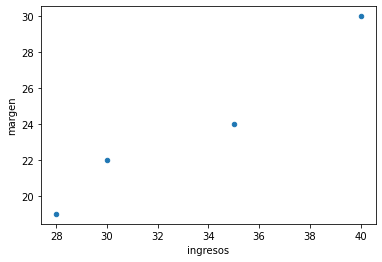

In [128]:
df_clientes.plot.scatter('ingresos', 'margen')

<AxesSubplot:xlabel='nombre'>

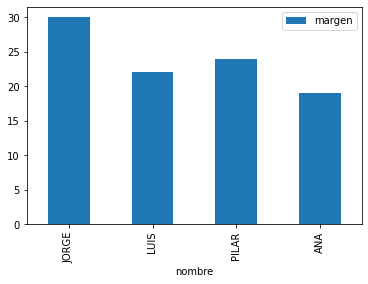

In [129]:
df_clientes.plot.bar('nombre', 'margen')

Tratar todas las columnas de un dataframe

In [130]:
#tratar todas las columnas en un bucle:
print(type(df_clientes.columns))
for col in df_clientes.columns:
    print(col)

<class 'pandas.core.indexes.base.Index'>
nombre
edad
ciudad
ingresos
costes
margen
fec
fec_d
fec2
edad_s1
lon_nombre
inicial
edad_s
rango_margen
rango_margen3


In [131]:
df_clientes.columns

Index(['nombre', 'edad', 'ciudad', 'ingresos', 'costes', 'margen', 'fec',
       'fec_d', 'fec2', 'edad_s1', 'lon_nombre', 'inicial', 'edad_s',
       'rango_margen', 'rango_margen3'],
      dtype='object')

In [132]:
for col in df_clientes.columns:
    print(col)
    if col == 'ciudad':
        df_clientes[col] = df_clientes[col] + " ( España)"
df_clientes

nombre
edad
ciudad
ingresos
costes
margen
fec
fec_d
fec2
edad_s1
lon_nombre
inicial
edad_s
rango_margen
rango_margen3


,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3
0,JORGE,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto
1,LUIS,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo
2,PILAR,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo
3,ANA,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo


El paso por __referencia__ también nos afecta en dataframe

In [133]:
df_clientes

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3
0,JORGE,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto
1,LUIS,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo
2,PILAR,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo
3,ANA,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo


In [134]:
#df_clientes3 = df_clientes # otra opción mejor: df_clientes.copy()
df_clientes3 = df_clientes.copy()
df_clientes['nombre'] = ['Pepe', 'Luis M.', 'Pilar J.', 'Ana Z.']
df_clientes3 

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3
0,JORGE,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto
1,LUIS,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo
2,PILAR,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo
3,ANA,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo


Método __loc__ para filtrar filas y columnas

In [135]:
# fila 0 columna nombre. 
df_clientes2 = df_clientes.loc[0,'nombre']
df_clientes2

'Pepe'

In [136]:
# filas 0 a 2 columnas nombre y ciudad
df_clientes2 = df_clientes.loc[0:2,['nombre', 'ciudad']]
df_clientes2

,nombre,ciudad
0,Pepe,Lugo ( España)
1,Luis M.,Murcia ( España)
2,Pilar J.,León ( España)


In [137]:
# todas las filas columnas nombre y ciudad
df_clientes2 = df_clientes.loc[:,['nombre', 'ciudad']].copy()
df_clientes2

,nombre,ciudad
0,Pepe,Lugo ( España)
1,Luis M.,Murcia ( España)
2,Pilar J.,León ( España)
3,Ana Z.,Soria ( España)


Filtrar solo columnas de un tipo

In [138]:
# filtrar columnas de un tipo (string)
df_clientes2 = df_clientes.loc[: ,  df_clientes.dtypes == object]
df_clientes2

,nombre,ciudad,fec2,edad_s1,inicial,edad_s,rango_margen,rango_margen3
0,Pepe,Lugo ( España),31/01/19,33,J,33,alto,alto
1,Luis M.,Murcia ( España),31/01/19,25,L,25,bajo,bajo
2,Pilar J.,León ( España),31/01/19,44,P,44,bajo,bajo
3,Ana Z.,Soria ( España),31/01/19,37,A,37,bajo,bajo


In [139]:
df_clientes

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3
0,Pepe,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto
1,Luis M.,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo
3,Ana Z.,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo


In [140]:
df_clientes2 = df_clientes.loc[df_clientes['edad'] > 35, :]
df_clientes2

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo
3,Ana Z.,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo


Otra opción es emplear el método __iloc__


In [141]:
# fila 0 columna 0 nombre
df_clientes2 = df_clientes.iloc[0,0]
# filas 0 a 2 columnas 0 y 1 nombre y ciudad
df_clientes2 = df_clientes.iloc[0:2,[0,1]]
df_clientes2

,nombre,edad
0,Pepe,33
1,Luis M.,25


Bucle para recorrer un dataframe usando loc

In [142]:
for i in range(len(df_clientes)):
    print(df_clientes.iloc[i,:])

nombre                          Pepe
edad                              33
ciudad                Lugo ( España)
ingresos                          40
costes                            10
margen                            30
fec              2019-01-31 00:00:00
fec_d            2020-02-15 00:00:00
fec2                        31/01/19
edad_s1                           33
lon_nombre                         5
inicial                            J
edad_s                            33
rango_margen                    alto
rango_margen3                   alto
Name: 0, dtype: object
nombre                       Luis M.
edad                              25
ciudad              Murcia ( España)
ingresos                          30
costes                             8
margen                            22
fec              2019-01-31 00:00:00
fec_d            2020-02-15 00:00:00
fec2                        31/01/19
edad_s1                           25
lon_nombre                         4
inicial        

__Filtrar filas__ en un dataframe

In [143]:
# filtrado por condición
df_clientes[df_clientes.nombre=="Ana"]

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3


Podemos usar el método query también

In [144]:
df_clientes.query("nombre=='Ana'")

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3


Con __timeit__ podemos comparar tiempos

In [145]:
%%timeit
df_clientes.query("nombre=='Ana'")

691 µs ± 7.93 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [146]:
%%timeit
df_clientes[df_clientes.nombre=="Ana"]

125 µs ± 934 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [147]:
df_clientes[df_clientes.nombre=="Ana"][['nombre', 'edad']]

,nombre,edad


In [148]:
# filtrado por condición
df_clientes[df_clientes.margen >=20]

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3
0,Pepe,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto
1,Luis M.,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo


In [149]:
df_clientes[df_clientes.ingresos.isin([10,30,40])]

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3
0,Pepe,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto
1,Luis M.,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo


In [150]:
# filtrado por condición  NOT IN 
# ~ también ALT GR + 4 y luego el caracter

df_clientes[~df_clientes.ingresos.isin([10,30,40])]
#df_clientes[np.logical_not(df_clientes.ingresos.isin([10,30,40]))]

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo
3,Ana Z.,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo


In [151]:
# filtrado por condición
df_clientes[df_clientes.ciudad=="Murcia ( España)"][['nombre','edad']]

,nombre,edad
1,Luis M.,25


__Ordenar__ un dataframe

Método sort

In [152]:
df_clientes.sort_values(by = 'nombre') # ordenar por nombre

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3
3,Ana Z.,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo
1,Luis M.,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo
0,Pepe,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo


In [153]:
df_clientes.sort_values(by = 'margen', ascending = False) # descendente

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3
0,Pepe,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo
1,Luis M.,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo
3,Ana Z.,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo


In [154]:
# Ordenar y filtrar campos
df_clientes.sort_values(by = 'nombre')[['nombre','ciudad']]

,nombre,ciudad
3,Ana Z.,Soria ( España)
1,Luis M.,Murcia ( España)
0,Pepe,Lugo ( España)
2,Pilar J.,León ( España)


In [155]:
df_clientes.sort_index() # ordenar por indice

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3
0,Pepe,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto
1,Luis M.,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo
3,Ana Z.,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo


Varios campos. Combinar ascendente y descendente

In [156]:
df_clientes.sort_values(by=['nombre', 'ciudad'], ascending=[True,False])

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3
3,Ana Z.,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo
1,Luis M.,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo
0,Pepe,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo


__Renombrado__ de columnas

In [157]:
#Renombrado de columnas:
df_clientes2 = df_clientes.rename(columns={"rango_margen": "rango_mar"})
df_clientes2

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_mar,rango_margen3
0,Pepe,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto
1,Luis M.,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo
3,Ana Z.,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo


Crear __rangos__

In [158]:
bins = [0,20,25,30]
df_clientes['rango_mar2'] = pd.cut(df_clientes['margen'], bins,
         labels=False)
df_clientes

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3,rango_mar2
0,Pepe,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto,2
1,Luis M.,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo,1
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo,1
3,Ana Z.,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo,0


In [159]:
df_clientes['rango_mar2'].value_counts()

1    2
2    1
0    1
Name: rango_mar2, dtype: int64

Valores únicos

In [160]:
df_clientes['rango_mar2'].unique

<bound method Series.unique of 0    2
1    1
2    1
3    0
Name: rango_mar2, dtype: int64>

Rangos incluyendo label

In [161]:
bins = [0,20,25,30]
df_clientes['rango_mar2'] = pd.cut(df_clientes['margen'], bins,
         labels=['bajo', 'medio', 'alto'])
df_clientes

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3,rango_mar2
0,Pepe,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto,alto
1,Luis M.,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo,medio
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo,medio
3,Ana Z.,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo,bajo


In [162]:
def rangos_mar(val):
    if val <= 20:
        rango=0
    elif val <= 25:
        rango = 1
    elif val <= 30:
        rango = 2
    else:
        rango = 3
    return(rango)
df_clientes['rango_mar3']=df_clientes['margen'].apply(rangos_mar)
df_clientes

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3,rango_mar2,rango_mar3
0,Pepe,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto,alto,2
1,Luis M.,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo,medio,1
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo,medio,1
3,Ana Z.,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo,bajo,0


Modificar sólo una parte del df

In [163]:
df_clientes2 = df_clientes.copy()

In [168]:
df_clientes2.head()

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3,rango_mar2,rango_mar3
0,Pepe,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto,alto,2
1,Luis M.,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo,medio,1
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo,medio,1
3,Ana Z.,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo,bajo,0


In [164]:
df_clientes2.loc[0:1,'año'] = df_clientes.loc[0:1,'año'] + 1

KeyError: 'año'

In [169]:
df_clientes2

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3,rango_mar2,rango_mar3
0,Pepe,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto,alto,2
1,Luis M.,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo,medio,1
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo,medio,1
3,Ana Z.,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo,bajo,0


__Pivotar__ tablas

In [170]:
df_clientes.pivot_table(values='edad', index='nombre', columns='ciudad') 

ciudad,León ( España),Lugo ( España),Murcia ( España),Soria ( España)
nombre,,,,
Ana Z.,NaN,NaN,NaN,37.0
Luis M.,NaN,NaN,25.0,NaN
Pepe,NaN,33.0,NaN,NaN
Pilar J.,44.0,NaN,NaN,NaN


Métodos para obtener __estadísticos__

In [171]:
df_clientes

,nombre,edad,ciudad,ingresos,costes,margen,fec,fec_d,fec2,edad_s1,lon_nombre,inicial,edad_s,rango_margen,rango_margen3,rango_mar2,rango_mar3
0,Pepe,33,Lugo ( España),40,10,30,2019-01-31,2020-02-15,31/01/19,33,5,J,33,alto,alto,alto,2
1,Luis M.,25,Murcia ( España),30,8,22,2019-01-31,2020-02-15,31/01/19,25,4,L,25,bajo,bajo,medio,1
2,Pilar J.,44,León ( España),35,11,24,2019-01-31,2020-02-15,31/01/19,44,5,P,44,bajo,bajo,medio,1
3,Ana Z.,37,Soria ( España),28,9,19,2019-01-31,2020-02-15,31/01/19,37,3,A,37,bajo,bajo,bajo,0


In [172]:
df_clientes.pivot_table(values=['edad', 'margen'], index='nombre', columns='ciudad') 

edad                                                  \
ciudad   León ( España) Lugo ( España) Murcia ( España) Soria ( España)   
nombre                                                                    
Ana Z.              NaN            NaN              NaN            37.0   
Luis M.             NaN            NaN             25.0             NaN   
Pepe                NaN           33.0              NaN             NaN   
Pilar J.           44.0            NaN              NaN             NaN   

                 margen                                                  
ciudad   León ( España) Lugo ( España) Murcia ( España) Soria ( España)  
nombre                                                                   
Ana Z.              NaN            NaN              NaN            19.0  
Luis M.             NaN            NaN             22.0             NaN  
Pepe                NaN           30.0              NaN             NaN  
Pilar J.           24.0            NaN              NaN             NaN

In [173]:
#Estadísticos:
df_clientes.describe()

,edad,ingresos,costes,margen,lon_nombre,rango_mar3
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,34.750000,33.250000,9.500000,23.750000,4.250000,1.000000
std,7.932003,5.377422,1.290994,4.645787,0.957427,0.816497
min,25.000000,28.000000,8.000000,19.000000,3.000000,0.000000
25%,31.000000,29.500000,8.750000,21.250000,3.750000,0.750000
50%,35.000000,32.500000,9.500000,23.000000,4.500000,1.000000
75%,38.750000,36.250000,10.250000,25.500000,5.000000,1.250000
max,44.000000,40.000000,11.000000,30.000000,5.000000,2.000000


In [174]:
df_clientes['ciudad'].describe()

count                  4
unique                 4
top       Lugo ( España)
freq                   1
Name: ciudad, dtype: object

In [175]:
df_clientes['edad'].mean()

34.75

In [176]:
df_clientes['ingresos'].sum()

133

In [177]:
df_clientes['ingresos'].cumsum()

0     40
1     70
2    105
3    133
Name: ingresos, dtype: int64

In [178]:
df_clientes['ingresos'].quantile(0.5)

32.5

In [179]:
Q1 = df_clientes['ingresos'].quantile(0.25)
Q1

29.5

In [180]:
Q2 = df_clientes['ingresos'].quantile(0.75)
Q2

36.25

<AxesSubplot:>

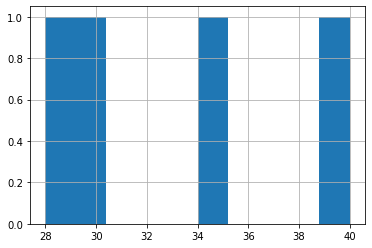

In [181]:
df_clientes['ingresos'].hist()

__Tablas cruzadas__ crosstab

In [182]:
#Conteo
pd.crosstab(df_ventas['oficina'], df_ventas['producto'])

producto,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P3,P4,P5,P9
oficina,,,,,,,,,,,,,,,,,
Lisboa,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Madrid,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0
Valencia,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0


In [183]:
#Funciones de agregación
pd.crosstab(df_ventas['oficina'], df_ventas['producto'], values=df_ventas['unidades'], aggfunc='sum')

producto,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P3,P4,P5,P9
oficina,,,,,,,,,,,,,,,,,
Lisboa,20.0,10.0,10.0,16.0,16.0,1.0,6.0,16.0,15.0,13.0,7.0,19.0,6.0,11.0,4.0,16.0,11.0
Madrid,20.0,NaN,NaN,NaN,NaN,1.0,7.0,NaN,NaN,NaN,NaN,19.0,NaN,8.0,5.0,18.0,NaN
Valencia,NaN,1.0,2.0,0.0,19.0,2.0,6.0,4.0,15.0,10.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
df_ventas.head()

,oficina,vendedor,producto,unidades
0,Madrid,m_vendedor1,P1,20
1,Madrid,m_vendedor1,P2,19
2,Madrid,m_vendedor1,P3,8
3,Madrid,m_vendedor1,P4,5
4,Madrid,m_vendedor1,P5,18


Obtener __agregados__

In [186]:
df_ventas['unidades'].mean()

10.352941176470589

In [187]:
df_ventas

,oficina,vendedor,producto,unidades
0,Madrid,m_vendedor1,P1,20
1,Madrid,m_vendedor1,P2,19
2,Madrid,m_vendedor1,P3,8
3,Madrid,m_vendedor1,P4,5
4,Madrid,m_vendedor1,P5,18
5,Madrid,m_vendedor4,P14,1
6,Madrid,m_vendedor4,P15,7
7,Valencia,v_vendedor1,P10,1
8,Valencia,v_vendedor1,P11,2
9,Valencia,v_vendedor1,P12,0


In [188]:
#agregados
# sumatorio y valor medio por oficina
df_ventas.groupby(['oficina']).sum()

,unidades
oficina,
Lisboa,197
Madrid,78
Valencia,77


In [189]:
df_ventas.groupby(['oficina']).sum()[['unidades']]
#df_ventas.groupby(['oficina']).sum()[['unidades', 'margen']]

,unidades
oficina,
Lisboa,197
Madrid,78
Valencia,77


In [190]:
# si no queremos que los campos de agrupación sean índice
df_ventas.groupby(['oficina'], as_index=False).sum()[['oficina','unidades']]

,oficina,unidades
0,Lisboa,197
1,Madrid,78
2,Valencia,77


In [191]:
df_ventas.groupby(['oficina']).agg(['sum', 'mean'])[['unidades']]

unidades           
              sum       mean
oficina                     
Lisboa        197  11.588235
Madrid         78  11.142857
Valencia       77   7.700000

In [192]:
df_ventas.groupby(['oficina']).agg(
  avg_unidades = ('unidades', 'mean'),
  sum_distance = ('unidades', 'sum')
)

,avg_unidades,sum_distance
oficina,,
Lisboa,11.588235,197
Madrid,11.142857,78
Valencia,7.700000,77


In [193]:
# Organización interna de un grupo
grupos = df_ventas.groupby(['oficina'])
for n, grupo in grupos:
    print(n)
    print(grupo)

Lisboa
   oficina     vendedor producto  unidades
17  Lisboa  l_vendedor1       P9        11
18  Lisboa  l_vendedor1      P10        10
19  Lisboa  l_vendedor1      P11        10
20  Lisboa  l_vendedor1      P12        16
21  Lisboa  l_vendedor1      P13        16
22  Lisboa  l_vendedor1      P14         1
23  Lisboa  l_vendedor1      P15         6
24  Lisboa  l_vendedor1      P16        16
25  Lisboa  l_vendedor1      P17        15
26  Lisboa  l_vendedor1      P18        13
27  Lisboa  l_vendedor1      P19         7
28  Lisboa  l_vendedor1      P20         6
29  Lisboa  l_vendedor2       P1        20
30  Lisboa  l_vendedor2       P2        19
31  Lisboa  l_vendedor2       P3        11
32  Lisboa  l_vendedor2       P4         4
33  Lisboa  l_vendedor2       P5        16
Madrid
  oficina     vendedor producto  unidades
0  Madrid  m_vendedor1       P1        20
1  Madrid  m_vendedor1       P2        19
2  Madrid  m_vendedor1       P3         8
3  Madrid  m_vendedor1       P4         5
4 

In [194]:
df_ventas

,oficina,vendedor,producto,unidades
0,Madrid,m_vendedor1,P1,20
1,Madrid,m_vendedor1,P2,19
2,Madrid,m_vendedor1,P3,8
3,Madrid,m_vendedor1,P4,5
4,Madrid,m_vendedor1,P5,18
5,Madrid,m_vendedor4,P14,1
6,Madrid,m_vendedor4,P15,7
7,Valencia,v_vendedor1,P10,1
8,Valencia,v_vendedor1,P11,2
9,Valencia,v_vendedor1,P12,0


In [195]:
df_ventas.groupby(['oficina']).sum().unidades

oficina
Lisboa      197
Madrid       78
Valencia     77
Name: unidades, dtype: int64

In [196]:
# añadir un having 
res = df_ventas.groupby(['oficina']).sum()['unidades']
res [ res > 100]

oficina
Lisboa    197
Name: unidades, dtype: int64

In [197]:
df_ventas.groupby(['oficina']).unidades.sum()

oficina
Lisboa      197
Madrid       78
Valencia     77
Name: unidades, dtype: int64

In [198]:
df_ventas.groupby(['oficina']).mean().round(2)

,unidades
oficina,
Lisboa,11.59
Madrid,11.14
Valencia,7.70


Manejar __grupos__

In [199]:
grupos = df_ventas.groupby(['oficina','producto'])
for n, grupo in grupos:
    print(n)
    print(grupo)

('Lisboa', 'P1')
   oficina     vendedor producto  unidades
29  Lisboa  l_vendedor2       P1        20
('Lisboa', 'P10')
   oficina     vendedor producto  unidades
18  Lisboa  l_vendedor1      P10        10
('Lisboa', 'P11')
   oficina     vendedor producto  unidades
19  Lisboa  l_vendedor1      P11        10
('Lisboa', 'P12')
   oficina     vendedor producto  unidades
20  Lisboa  l_vendedor1      P12        16
('Lisboa', 'P13')
   oficina     vendedor producto  unidades
21  Lisboa  l_vendedor1      P13        16
('Lisboa', 'P14')
   oficina     vendedor producto  unidades
22  Lisboa  l_vendedor1      P14         1
('Lisboa', 'P15')
   oficina     vendedor producto  unidades
23  Lisboa  l_vendedor1      P15         6
('Lisboa', 'P16')
   oficina     vendedor producto  unidades
24  Lisboa  l_vendedor1      P16        16
('Lisboa', 'P17')
   oficina     vendedor producto  unidades
25  Lisboa  l_vendedor1      P17        15
('Lisboa', 'P18')
   oficina     vendedor producto  unidades
26  

__Exportar__ a fichero csv

In [200]:
df_ventas

,oficina,vendedor,producto,unidades
0,Madrid,m_vendedor1,P1,20
1,Madrid,m_vendedor1,P2,19
2,Madrid,m_vendedor1,P3,8
3,Madrid,m_vendedor1,P4,5
4,Madrid,m_vendedor1,P5,18
5,Madrid,m_vendedor4,P14,1
6,Madrid,m_vendedor4,P15,7
7,Valencia,v_vendedor1,P10,1
8,Valencia,v_vendedor1,P11,2
9,Valencia,v_vendedor1,P12,0


Graficos

<AxesSubplot:xlabel='oficina'>

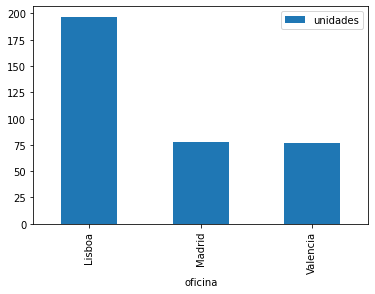

In [201]:
#plot muestra las métricas en altura de barras frente a los valores del índice
df_ventas.groupby(['oficina']).sum().plot(kind="bar")

Text(0.5, 0, 'Oficina')

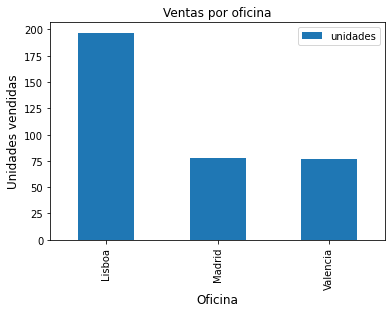

In [202]:
ax = df_ventas.groupby(['oficina']).sum().plot(kind="bar")
ax.set_title("Ventas por oficina", fontsize=12)
ax.set_ylabel("Unidades vendidas", fontsize=12)
ax.set_xlabel("Oficina", fontsize=12)

In [203]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

<AxesSubplot:xlabel='producto'>

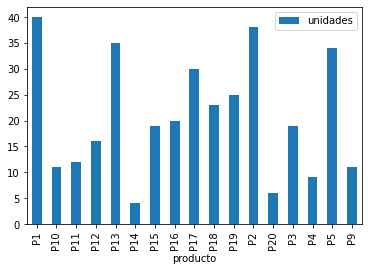

In [204]:
df_ventas.groupby(['producto']).sum().plot(kind="bar")

In [205]:
df_ventas.to_csv("ficheros\\export_df1.txt", index=False)

In [206]:
#exportación a Excel
df_ventas.to_excel("ficheros\\expexcel_df1.xlsx", index=False)

In [208]:
#exportacion a JSON
df_ventas.to_json("ficheros\\expjson_df1.json")

In [209]:
#exportacion a JSON con otra orientación (tabla)
df_ventas.to_json("ficheros\\ventas.json", orient='table')

Lectura desde tablas SAS

In [210]:
df = pd.read_sas("ficheros\\customer1.sas7bdat", format='sas7bdat', encoding = 'latin-1')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ficheros\\customer1.sas7bdat'

Lectura desde JSON

In [212]:
df_lc = pd.read_json("ficheros\\localizaciones.json")
df_lc.head(5)

,latitude,longitude,city,description,cod_postal
0,40.416875,-3.703308,Madrid,Puerta del Sol,NaN
1,40.417438,-3.693363,Madrid,Paseo del Prado,NaN
2,40.407015,-3.691163,Madrid,Estacion de Atocha,28001.0


In [213]:
df_iris = pd.read_json("https://raw.githubusercontent.com/domoritz/maps/master/data/iris.json")
df_iris.head(5)

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [214]:
#pasar de df a lista de diccionarios
lisdoc = df_ventas.to_dict(orient='records')

In [215]:
lisdoc

[{'oficina': 'Madrid',
  'vendedor': 'm_vendedor1',
  'producto': 'P1',
  'unidades': 20},
 {'oficina': 'Madrid',
  'vendedor': 'm_vendedor1',
  'producto': 'P2',
  'unidades': 19},
 {'oficina': 'Madrid',
  'vendedor': 'm_vendedor1',
  'producto': 'P3',
  'unidades': 8},
 {'oficina': 'Madrid',
  'vendedor': 'm_vendedor1',
  'producto': 'P4',
  'unidades': 5},
 {'oficina': 'Madrid',
  'vendedor': 'm_vendedor1',
  'producto': 'P5',
  'unidades': 18},
 {'oficina': 'Madrid',
  'vendedor': 'm_vendedor4',
  'producto': 'P14',
  'unidades': 1},
 {'oficina': 'Madrid',
  'vendedor': 'm_vendedor4',
  'producto': 'P15',
  'unidades': 7},
 {'oficina': 'Valencia',
  'vendedor': 'v_vendedor1',
  'producto': 'P10',
  'unidades': 1},
 {'oficina': 'Valencia',
  'vendedor': 'v_vendedor1',
  'producto': 'P11',
  'unidades': 2},
 {'oficina': 'Valencia',
  'vendedor': 'v_vendedor1',
  'producto': 'P12',
  'unidades': 0},
 {'oficina': 'Valencia',
  'vendedor': 'v_vendedor1',
  'producto': 'P13',
  'unidades

In [216]:
lis_d = df_ventas.values.tolist()
lis_d

[['Madrid', 'm_vendedor1', 'P1', 20],
 ['Madrid', 'm_vendedor1', 'P2', 19],
 ['Madrid', 'm_vendedor1', 'P3', 8],
 ['Madrid', 'm_vendedor1', 'P4', 5],
 ['Madrid', 'm_vendedor1', 'P5', 18],
 ['Madrid', 'm_vendedor4', 'P14', 1],
 ['Madrid', 'm_vendedor4', 'P15', 7],
 ['Valencia', 'v_vendedor1', 'P10', 1],
 ['Valencia', 'v_vendedor1', 'P11', 2],
 ['Valencia', 'v_vendedor1', 'P12', 0],
 ['Valencia', 'v_vendedor1', 'P13', 19],
 ['Valencia', 'v_vendedor1', 'P14', 2],
 ['Valencia', 'v_vendedor1', 'P15', 6],
 ['Valencia', 'v_vendedor1', 'P16', 4],
 ['Valencia', 'v_vendedor1', 'P17', 15],
 ['Valencia', 'v_vendedor1', 'P18', 10],
 ['Valencia', 'v_vendedor1', 'P19', 18],
 ['Lisboa', 'l_vendedor1', 'P9', 11],
 ['Lisboa', 'l_vendedor1', 'P10', 10],
 ['Lisboa', 'l_vendedor1', 'P11', 10],
 ['Lisboa', 'l_vendedor1', 'P12', 16],
 ['Lisboa', 'l_vendedor1', 'P13', 16],
 ['Lisboa', 'l_vendedor1', 'P14', 1],
 ['Lisboa', 'l_vendedor1', 'P15', 6],
 ['Lisboa', 'l_vendedor1', 'P16', 16],
 ['Lisboa', 'l_vendedor

Creación de data frames en base a rangos de valores

In [217]:
date_from = "2020-01-01"
date_to = "2020-01-05"
fechas = pd.date_range(date_from, date_to, freq="D")
fechas

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05'],
              dtype='datetime64[ns]', freq='D')

In [218]:
df = pd.DataFrame(fechas, columns=['fec'])
df

,fec
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05


In [211]:
df['ventas'] = range(1,6)
df

ValueError: Length of values (5) does not match length of index (4)

Obtener datos de una __BBDD__. Antes hacer: conda install -c anaconda mysql-connector-python 

In [222]:
import mysql

ModuleNotFoundError: No module named 'mysql'

In [223]:
import mysql.connector
connmysql = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="root",
  use_pure = True
)
print(connmysql)

ModuleNotFoundError: No module named 'mysql'

In [224]:
cursordb = connmysql.cursor()
sql = "select cod_tarifa, cod_cliente, hc_consumo FROM dwh_consumo.hc_consumo"
cursordb.execute(sql)
res = cursordb.fetchall() #lista de tuplas

df = pd.DataFrame(res, columns=['cod_tarifa', 'cod_cliente', 'hc_consumo'])

NameError: name 'connmysql' is not defined

In [ ]:
df